<a href="https://colab.research.google.com/github/PUNEETSUBHANJI/Netflix_movies_Tv_shows_clustering/blob/main/Netflix_Movies_Tv_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



In [ ]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#<u>Importing all Necessary Libraries</u>

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import pylab
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
import plotly.express as px
import time
from datetime import datetime
from datetime import timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
#All Machine learning Models are imported here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('all')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

#<u>NETFLIX MOVIES AND TV SHOWS  DATA FRAME</u>

In [ ]:
#loading the dataset
data=pd.read_csv('/content/drive/MyDrive/Projects- Almabetter_Puneet/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
data=pd.DataFrame(data)

##Data types of each column

In [ ]:
#head of data
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# tail of data
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
#shape of df
data.shape

(7787, 12)

In [ ]:
#checking null values
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

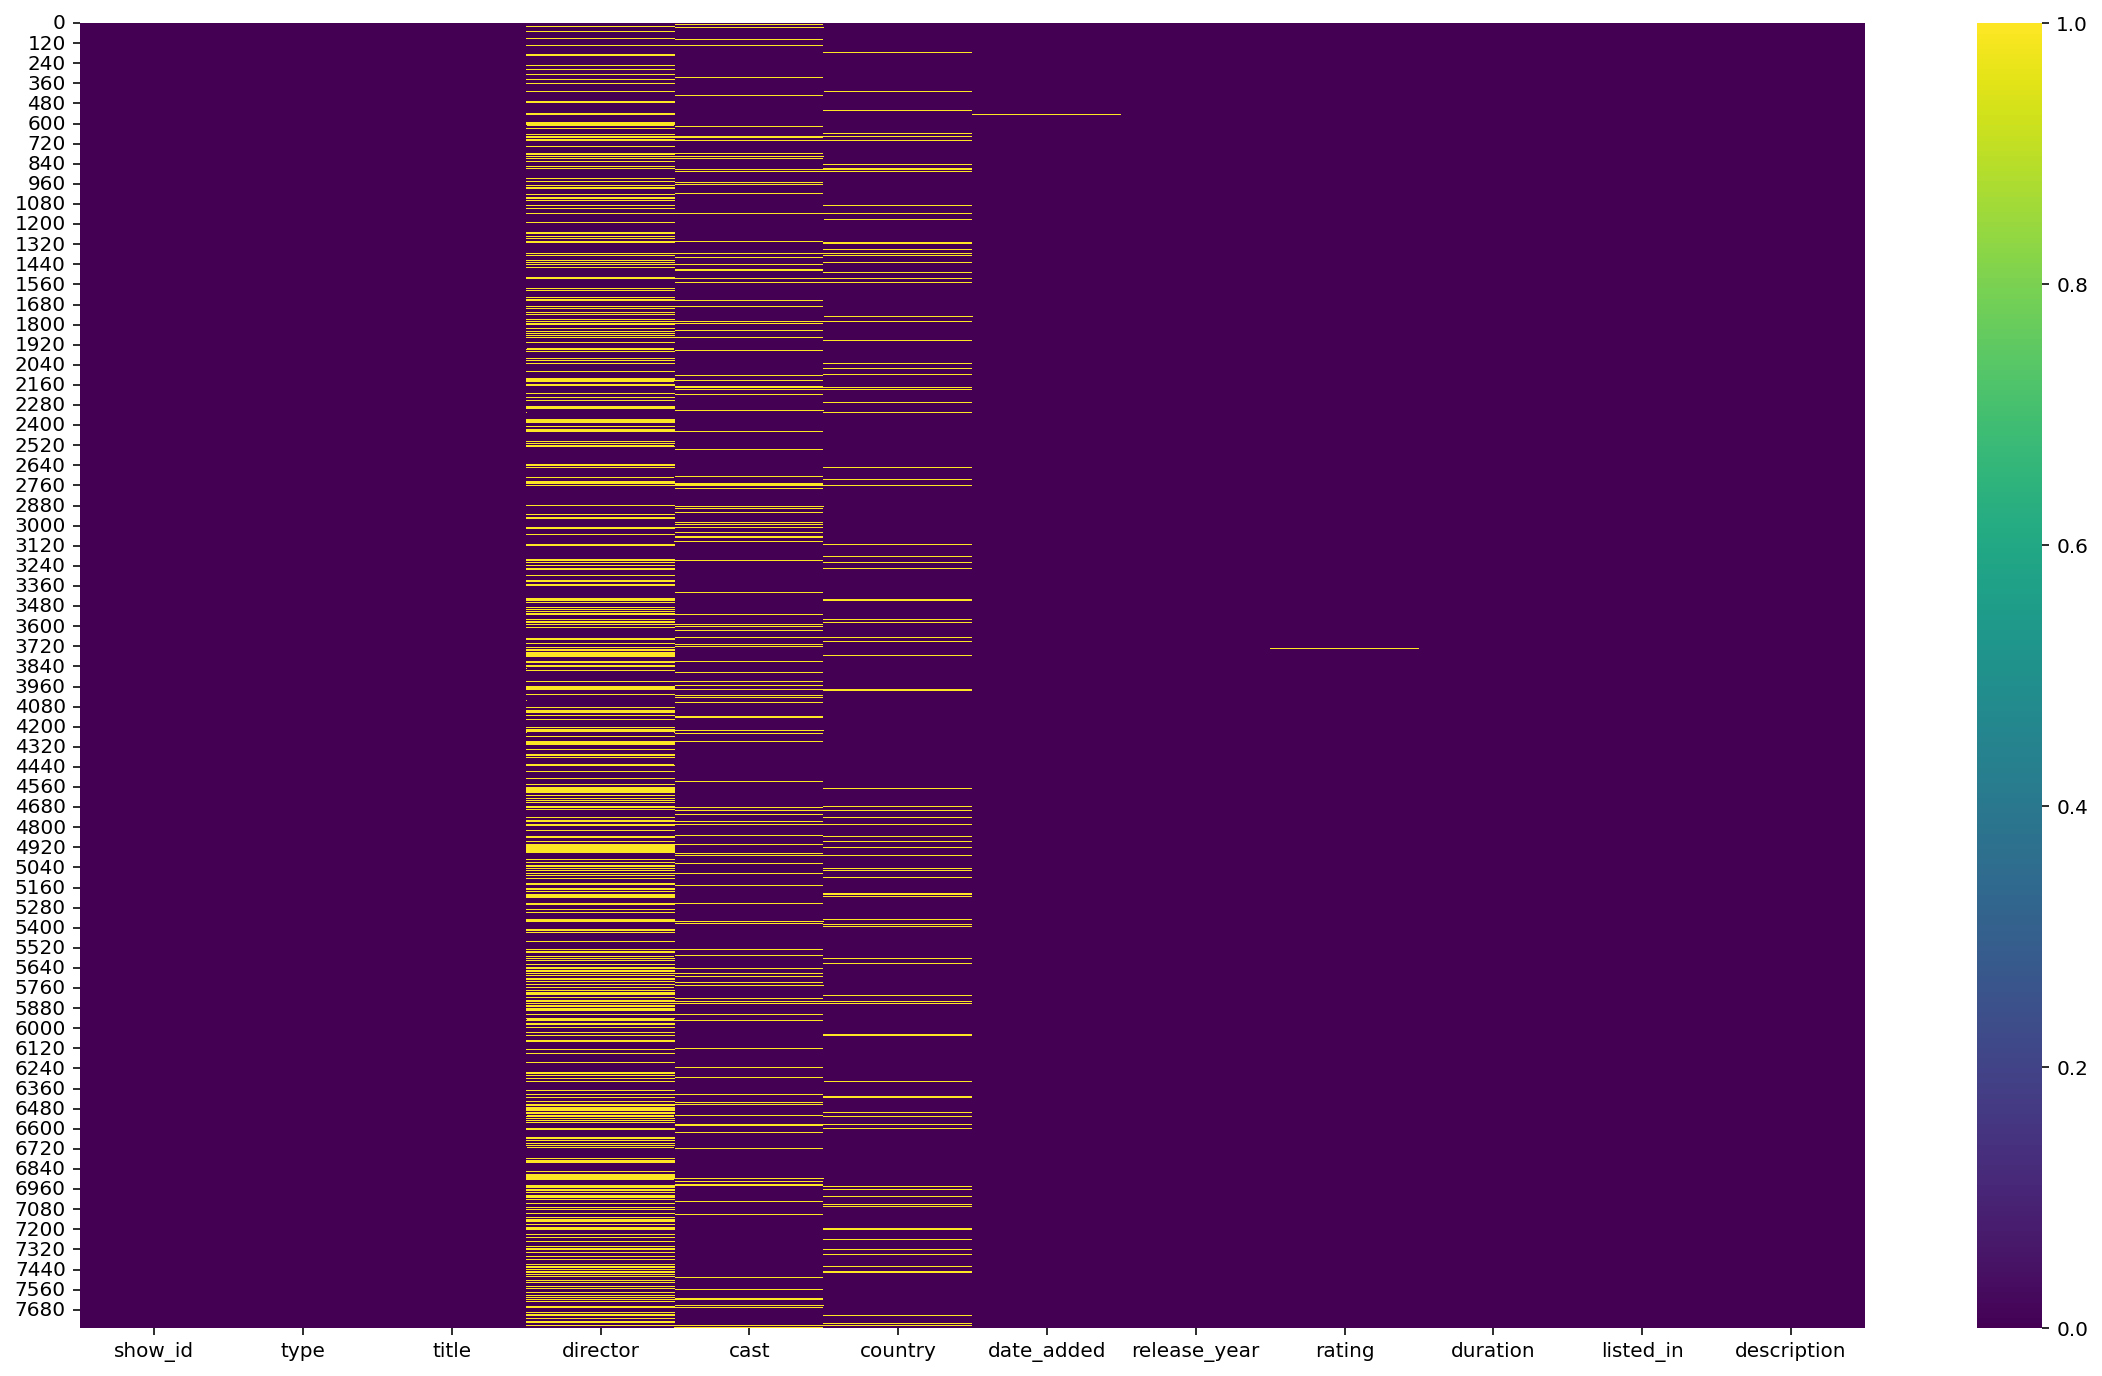

In [ ]:
#checking null values by visualizing it
plt.figure(figsize=(20,12))
sns.heatmap(data.isna(), cmap="viridis")

In [ ]:
#droping director feature from data 
data.drop(['director'],axis=1,inplace=True)
#droping all null values from cast,country,date_added and rating features 
data_cleaned=data.dropna(subset=['cast','country','date_added','rating'],axis=0)

In [ ]:
#cheacking null values of data_cleaned variable 
data_cleaned.isnull().sum()/len(data)*100

show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [ ]:
#using lambda funtion for country feature in data_cleaned variable
data_cleaned['country']=data_cleaned['country'].apply(lambda x:x.split(","))

In [ ]:
#creating new variable as df_new 
data_new=pd.DataFrame(columns=data_cleaned.columns)

In [ ]:
#using iterrows() function in country feature
indic=0
count=0
for index, row in data_cleaned.iterrows():
    if len(data_cleaned.loc[index,'country'])>1:
      count=len(data_cleaned.loc[index,'country'])+count
      for data in data_cleaned.loc[index,'country']:
        country_name=[]
        indic=indic+0
        country_name_list=list(data_cleaned.loc[index])
        country_name.append(data)
        country_name_list[4]=country_name
        data_new.loc[indic]=country_name_list
        indic=indic+1
      data_cleaned.drop(index,inplace=True)

In [ ]:
#using reset_index() method for df_cleaned variable
data_cleaned.reset_index(drop=True,inplace=True)
data_clean_frame=data_cleaned.append(data_new,ignore_index=True)

In [ ]:
#using the lambda function for some data augmentation
data_clean_frame['country']=data_clean_frame['country'].apply(lambda x:x[0])
data_clean_frame['date_added']=data_clean_frame['date_added'].apply(lambda x:x.strip())
data_clean_frame['date_added']=data_clean_frame['date_added'].apply(lambda x:datetime.strptime(x,'%B %d, %Y'))
data_clean_frame['release_year']=data_clean_frame['release_year'].astype('int')

In [ ]:
#changing the names of some features 
data_clean_frame.rename(columns={'type':'Type_of_show','title':'Title_of_Movie/show','cast':'Actors','date_added':'Date_Added_in_netflix','release_year':'Release_year','rating':'Ratings','listed_in':'Genre'},inplace=True)

In [ ]:
#clean dataframe
data_clean_frame.drop([6361,6527],inplace=True)
data_clean_frame.reset_index(drop=True,inplace=True)

In [ ]:
#head of data_clean_frame
data_clean_frame.head()

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#shape of data_clean_frame
data_clean_frame.shape

(8262, 11)

## Data Cleaning and Feature Engineering 

In [ ]:
#checking dtype of data_clean_frame
data_clean_frame.dtypes

show_id                          object
Type_of_show                     object
Title_of_Movie/show              object
Actors                           object
country                          object
Date_Added_in_netflix    datetime64[ns]
Release_year                      int64
Ratings                          object
duration                         object
Genre                            object
description                      object
dtype: object